<center>
    <big><b>Machine Learning Models</b></big>
</center>

After **exploring** the data and clean it, now it's the machine learning modelling time.

# Imports

In [45]:
# data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

# machine learning
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# visualization
from yellowbrick.regressor import PredictionError, ResidualsPlot

# pickle
import pickle

# warnings
import warnings

# Set-up

In [2]:
warnings.filterwarnings('ignore')

# Get Data

In [3]:
df = pd.read_parquet('../data/cleaned/zomato_cleaned.parquet')

# Preprocessing

In [4]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Convert the online categorical variables

In [5]:
df['online_order'][df['online_order'] == 'Yes'] = 1
df['online_order'][df['online_order'] == 'No'] = 0

In [6]:
df['online_order'].value_counts(normalize = True)

online_order
1    0.704491
0    0.295509
Name: proportion, dtype: float64

In [7]:
df['online_order'] = pd.to_numeric(df['online_order'])

# Change the string categorical into a categorical int

In [8]:
df['book_table'][df['book_table'] == 'Yes'] = 1
df['book_table'][df['book_table'] == 'No'] = 0

In [9]:
df['book_table'] = pd.to_numeric(df['book_table'])

In [10]:
df['book_table'].value_counts(normalize = True)

book_table
0    0.739461
1    0.260539
Name: proportion, dtype: float64

# Encoding categorical variables

In [11]:
le = LabelEncoder()

In [12]:
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])
df['menu_item'] = le.fit_transform(df['menu_item'])

In [13]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


# Column selection

In [15]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('../data/features/zomato_features.csv')

This dataset will be used to build the web application at the end.

In [16]:
my_data.corr().round(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
online_order,1.00,-0.14,-0.04,-0.08,-0.10,0.05,-0.02,-0.29,-0.34
book_table,-0.14,1.00,0.35,0.33,0.11,-0.22,0.01,0.60,0.09
rate,-0.04,0.35,1.00,0.38,0.11,-0.15,-0.10,0.31,0.01
votes,-0.08,0.33,0.38,1.00,0.05,-0.09,-0.05,0.31,0.03
location,-0.10,0.11,0.11,0.05,1.00,-0.08,-0.00,0.20,0.02
rest_type,0.05,-0.22,-0.15,-0.09,-0.08,1.00,0.26,-0.26,-0.04
cuisines,-0.02,0.01,-0.10,-0.05,-0.00,0.26,1.00,-0.05,0.03
cost,-0.29,0.60,0.31,0.31,0.20,-0.26,-0.05,1.00,0.13
menu_item,-0.34,0.09,0.01,0.03,0.02,-0.04,0.03,0.13,1.00


In [17]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800,5047
1,1,0,787,1,20,594,800,5047
2,1,0,918,1,16,484,800,5047
3,0,0,88,1,62,1587,300,5047
4,0,0,166,4,20,1406,600,5047


In [18]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

# Train and test datasets

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [20]:
x_train.to_csv('../data/features/x_train.csv')
x_test.to_csv('../data/features/x_test.csv')
y_train.to_csv('../data/features/y_train.csv')
y_test.to_csv('../data/features/y_test.csv')

# Model Building

## Creating Experiment

In [25]:
# Set tracking uri
mlflow.set_tracking_uri('../data/mlruns')

# Start an MLflow experiment named "zomato_modelling"
mlflow.set_experiment("zomato_modelling")

2023/11/17 09:32:50 INFO mlflow.tracking.fluent: Experiment with name 'zomato_modelling' does not exist. Creating a new experiment.


<Experiment: artifact_location='/home/pop/Documents/td_projects/restaurant_rating_prediction/notebooks/../data/mlruns/262613561040705519', creation_time=1700224370404, experiment_id='262613561040705519', last_update_time=1700224370404, lifecycle_stage='active', name='zomato_modelling', tags={}>

## Linear Regression

In [28]:
with mlflow.start_run():

    # linear regression instance
    lr_model = LinearRegression()
    
    # fitting model
    lr_model.fit(x_train, y_train)
    
    # predicted values
    y_pred = lr_model.predict(x_test)
    
    # r2 score
    r2 = r2_score(y_test, y_pred)
    
    # Log parameters, metrics and model
    mlflow.log_param('test_size', 0.2)
    mlflow.log_metric('r2_score', r2)
    mlflow.sklearn.log_model(lr_model, 'linear_regression_model')
    
    print(f'R2 Score: {r2:.2f}')

mlflow.end_run()

2023/11/17 09:35:06 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpq1_ru8lx/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.3.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


R2 Score: 0.23


## Decision Tree Regressor

In [29]:
with mlflow.start_run():

    # decision tree regressor
    dt_model = DecisionTreeRegressor()
    
    # fitting model
    dt_model.fit(x_train, y_train)
    
    # predicted values
    y_pred_dt = dt_model.predict(x_test)
    
    # r2 score
    r2_dt = r2_score(y_test, y_pred_dt)
    
    # Log parameters, metrics, and model for Decision Tree Regressor
    mlflow.log_param('test_size', 0.2)
    mlflow.log_metric('r2_score', r2_dt)
    mlflow.sklearn.log_model(dt_model, 'decision_tree_regressor_model')
    
    print(f'Decision Tree Regression R2 Score: {r2_dt:.2f}')

mlflow.end_run()

Decision Tree Regression R2 Score: 0.87


# Random Forest Regressor

In [30]:
# MLflow start run for Random Forest Regressor
with mlflow.start_run():

    # Random Forest regressor instance
    RF_model = RandomForestRegressor()

    # Fitting the model
    RF_model.fit(x_train, y_train)

    # Predicted values
    y_pred_rf = RF_model.predict(x_test)

    # R2 score
    r2_rf = r2_score(y_test, y_pred_rf)

    # Log parameters, metrics, and model for Random Forest Regressor
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("r2_score", r2_rf)
    mlflow.sklearn.log_model(RF_model, "random_forest_regressor_model")

    # Print R2 score for Random Forest Regressor
    print(f'Random Forest Regressor R2 Score: {r2_rf: .2f}')

# MLflow end run
mlflow.end_run()

Random Forest Regressor R2 Score: 0.9081948802795263


# ExtraTree Regressor

In [31]:
# MLflow start run for Extra Trees Regressor
with mlflow.start_run():

    # Extra Trees regressor instance
    ET_model = ExtraTreesRegressor()

    # Fitting the model
    ET_model.fit(x_train, y_train)

    # Predicted values
    y_pred_et = ET_model.predict(x_test)

    # R2 score
    r2_et = r2_score(y_test, y_pred_et)

    # Log parameters, metrics, and model for Extra Trees Regressor
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("r2_score", r2_et)
    mlflow.sklearn.log_model(ET_model, "extra_trees_regressor_model")

    # Print R2 score for Extra Trees Regressor
    print(f'Extra Trees Regressor R2 Score: {r2_et: .2f}')

# MLflow end run
mlflow.end_run()

Extra Trees Regressor R2 Score:  0.93


# Visualizing models

In [48]:
# Create a folder to store the images
image_folder = '../images/modelling'
os.makedirs(image_folder, exist_ok=True)

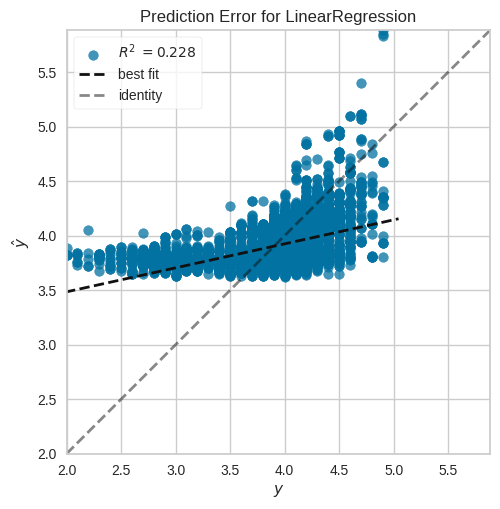

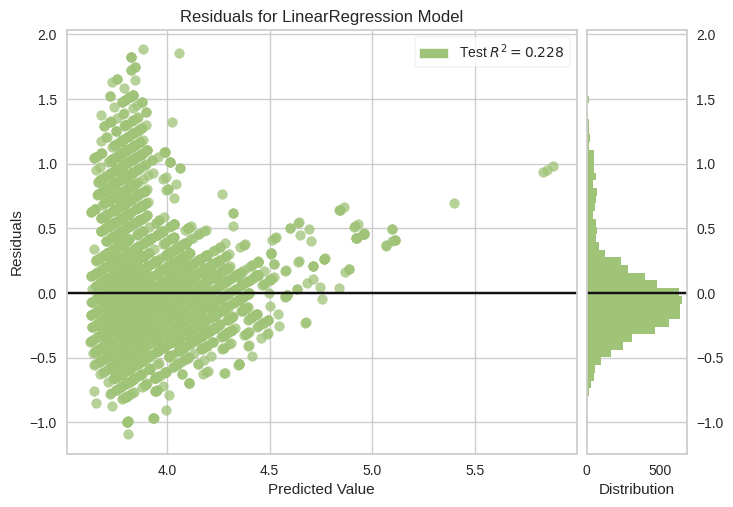

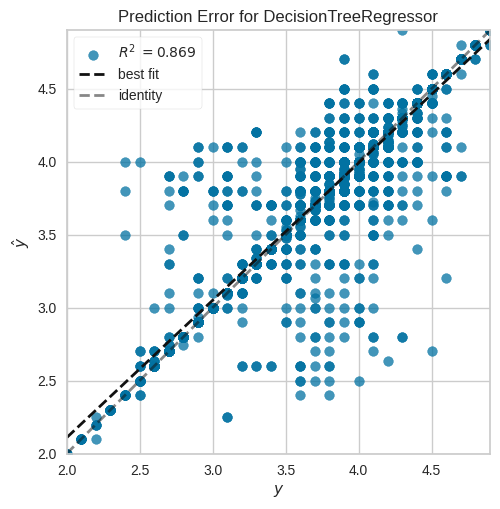

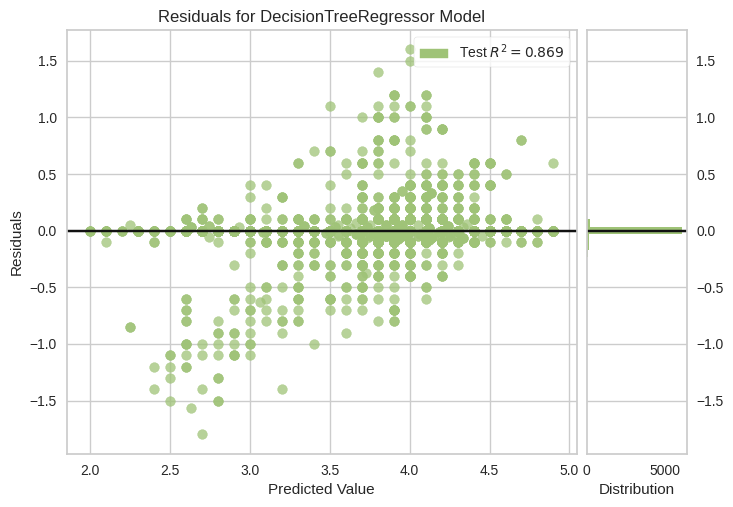

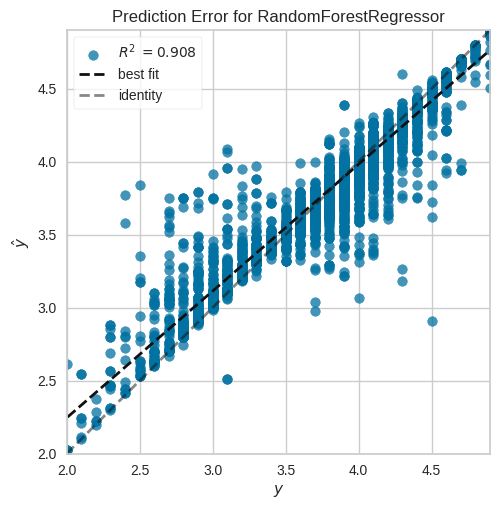

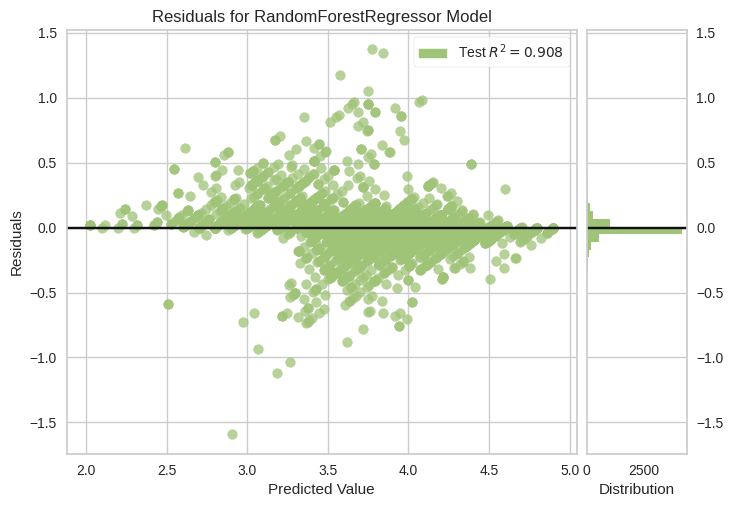

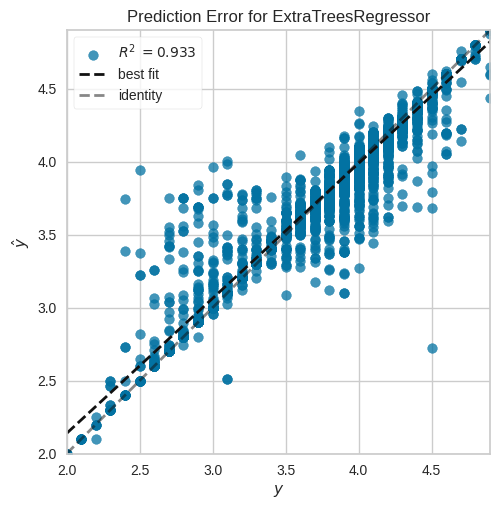

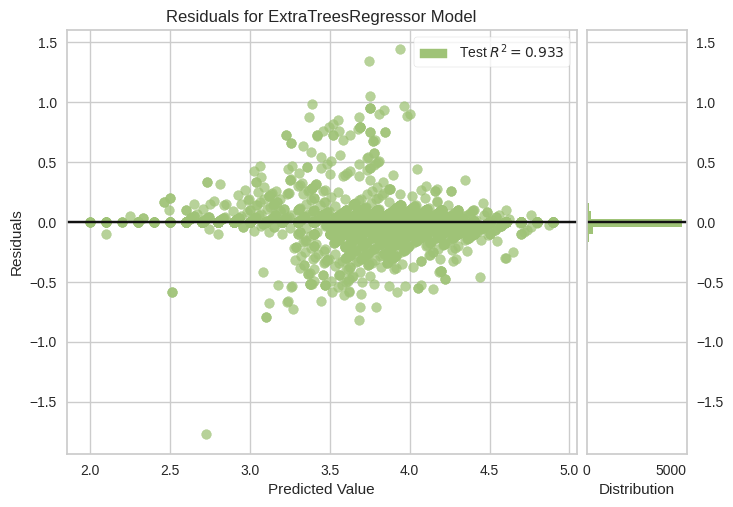

In [49]:
# Assuming you have already defined your models and data

# Linear Regression
visualizer_lr = PredictionError(lr_model, is_fitted=True)
visualizer_lr.score(x_test, y_test)
visualizer_lr.show()
plt.savefig(os.path.join(image_folder, 'prediction_error_lr.png'))
plt.close()

visualizer_resid_lr = ResidualsPlot(lr_model, is_fitted=True)
visualizer_resid_lr.score(x_test, y_test)
visualizer_resid_lr.show()
plt.savefig(os.path.join(image_folder, 'residuals_lr.png'))
plt.close()

# Decision Tree Regressor
visualizer_dt = PredictionError(dt_model, is_fitted=True)
visualizer_dt.score(x_test, y_test)
visualizer_dt.show()
plt.savefig(os.path.join(image_folder, 'prediction_error_dt.png'))
plt.close()

visualizer_resid_dt = ResidualsPlot(dt_model, is_fitted=True)
visualizer_resid_dt.score(x_test, y_test)
visualizer_resid_dt.show()
plt.savefig(os.path.join(image_folder, 'residuals_dt.png'))
plt.close()

# Random Forest Regressor
visualizer_rf = PredictionError(RF_model, is_fitted=True)
visualizer_rf.score(x_test, y_test)
visualizer_rf.show()
plt.savefig(os.path.join(image_folder, 'prediction_error_rf.png'))
plt.close()

visualizer_resid_rf = ResidualsPlot(RF_model, is_fitted=True)
visualizer_resid_rf.score(x_test, y_test)
visualizer_resid_rf.show()
plt.savefig(os.path.join(image_folder, 'residuals_rf.png'))
plt.close()

# Extra Trees Regressor
visualizer_et = PredictionError(ET_model, is_fitted=True)
visualizer_et.score(x_test, y_test)
visualizer_et.show()
plt.savefig(os.path.join(image_folder, 'prediction_error_et.png'))
plt.close()

visualizer_resid_et = ResidualsPlot(ET_model, is_fitted=True)
visualizer_resid_et.score(x_test, y_test)
visualizer_resid_et.show()
plt.savefig(os.path.join(image_folder, 'residuals_et.png'))
plt.close()

The extra tree regressor gives the best model. Now it'll be used pickle to save the model.

In [39]:
# saving model
pickle.dump(ET_model, open('../model/model.pkl', 'wb'))